In [2]:
import cv2

sv_j = cv2.imread("./Dataset/kodak_db/kodim01.png")
i=0
while i <= 100:
    cv2.imwrite("./Dataset/tests/" + str(i) + ".jpeg", sv_j, [int(cv2.IMWRITE_JPEG_QUALITY), i])
    i = i + 1

In [3]:
from skimage.metrics import mean_squared_error
import numpy as np
import os

lossless = cv2.imread("./Dataset/kodak_db/kodim01.png")

mse = []
psnr = []
psnr_cv2 = []
bpp = []

i=0
while i <= 100:
    compressed = cv2.imread("./Dataset/tests/" + str(i) + ".jpeg")
    psnr_cv2_ = cv2.PSNR(lossless, compressed)
    psnr_cv2.append(float(psnr_cv2_))
    mse_jpeg = mean_squared_error(lossless, compressed)
    mse.append(float(mse_jpeg))
    psnr_jpeg = 20 * np.log10(255 / (np.sqrt(mse_jpeg)))
    psnr.append(float(psnr_jpeg))

    compressed_file_size = os.path.getsize("./Dataset/tests/" + str(i) + ".jpeg")
    bpp_compressed = (compressed_file_size * 8) / ( 768 * 512 )
    bpp.append(float(bpp_compressed))

    i = i + 1





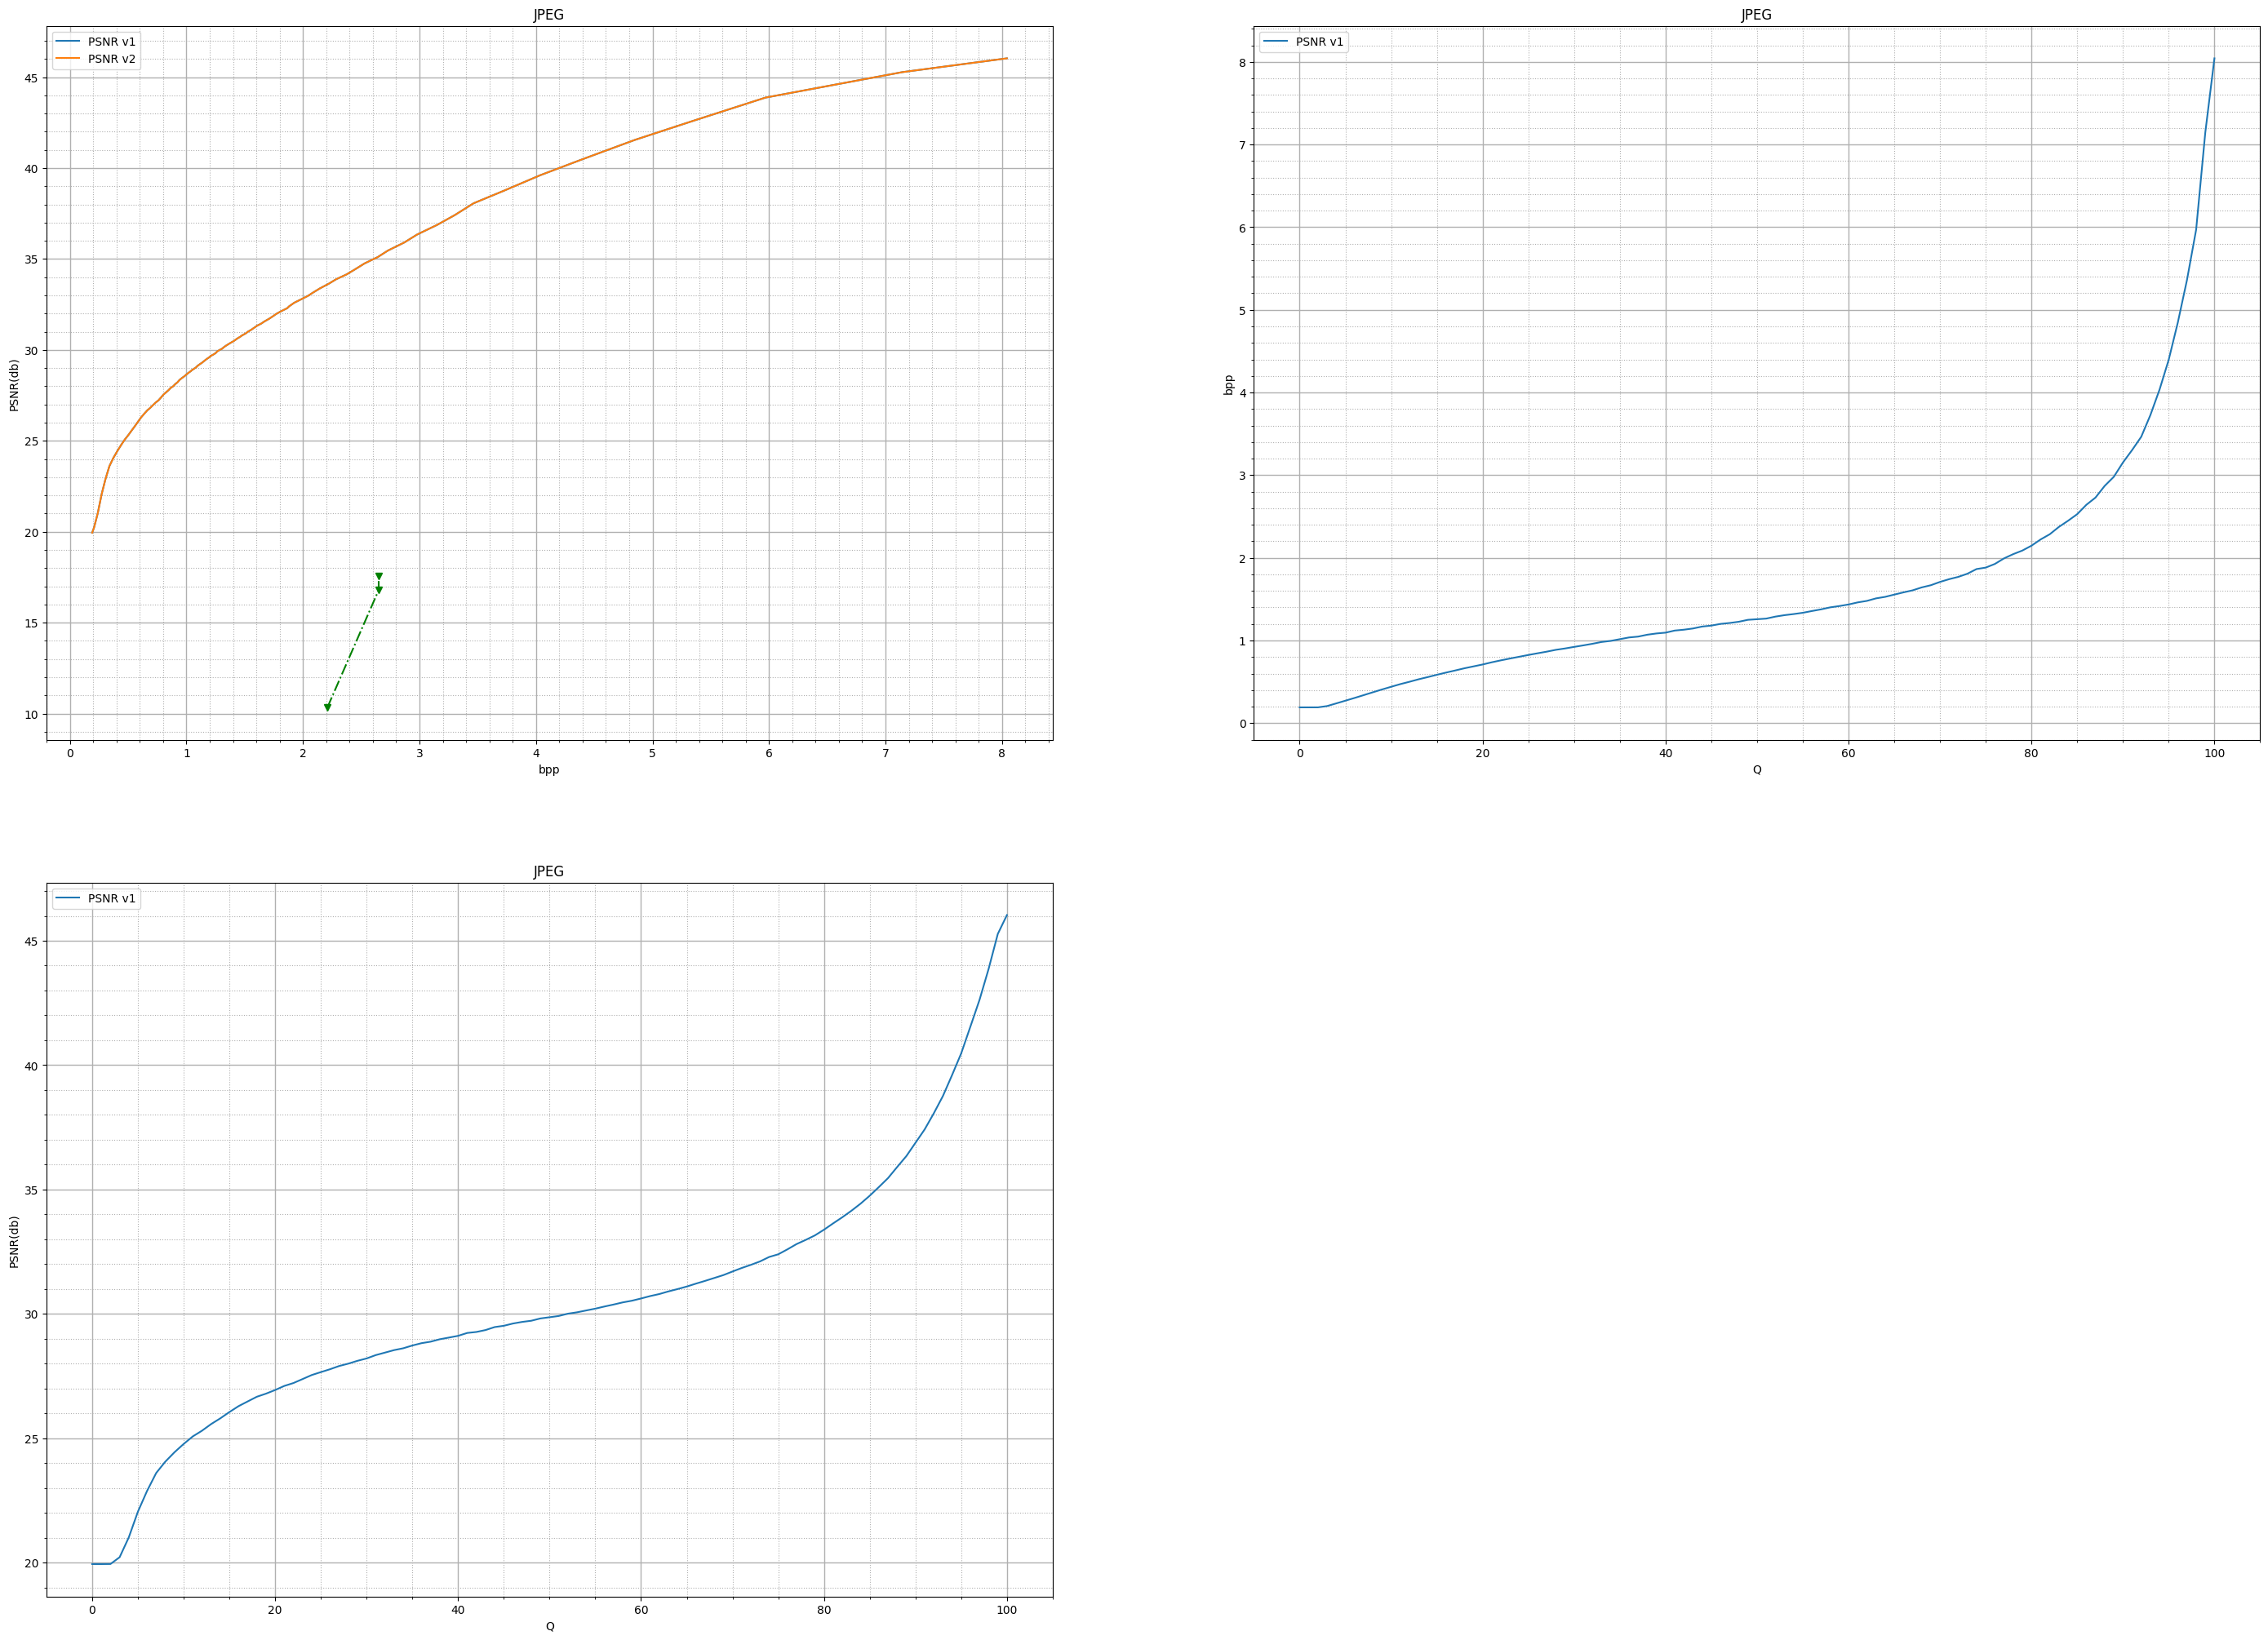

In [4]:
import matplotlib.pyplot as plt

my_bpp = [2.21, 2.65, 2.65]
my_psnr = [10.34, 16.79, 17.58]

f = plt.figure()
f.set_figwidth(35)
f.set_figheight(25)

sp = plt.subplot(221)

plt.plot(bpp, psnr)
plt.plot(bpp, psnr_cv2)
plt.plot(my_bpp, my_psnr,'v-.g')
plt.grid(True)
plt.title('JPEG')
plt.ylabel('PSNR(db)')
plt.xlabel('bpp')
plt.legend(['PSNR v1', 'PSNR v2'], loc='upper left')

plt.grid(which = "major", linewidth = 1)
plt.grid(which = "minor", linewidth = 0.8, linestyle=':')
plt.minorticks_on()

sp = plt.subplot(222)

plt.plot(bpp)
plt.grid(True)
plt.title('JPEG')
plt.ylabel('bpp')
plt.xlabel('Q')
plt.legend(['PSNR v1', 'PSNR v2'], loc='upper left')

plt.grid(which = "major", linewidth = 1)
plt.grid(which = "minor", linewidth = 0.8, linestyle=':')
plt.minorticks_on()

sp = plt.subplot(223)

plt.plot(psnr)
plt.grid(True)
plt.title('JPEG')
plt.ylabel('PSNR(db)')
plt.xlabel('Q')
plt.legend(['PSNR v1', 'PSNR v2'], loc='upper left')

plt.grid(which = "major", linewidth = 1)
plt.grid(which = "minor", linewidth = 0.8, linestyle=':')
plt.minorticks_on()

plt.show()


In [5]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


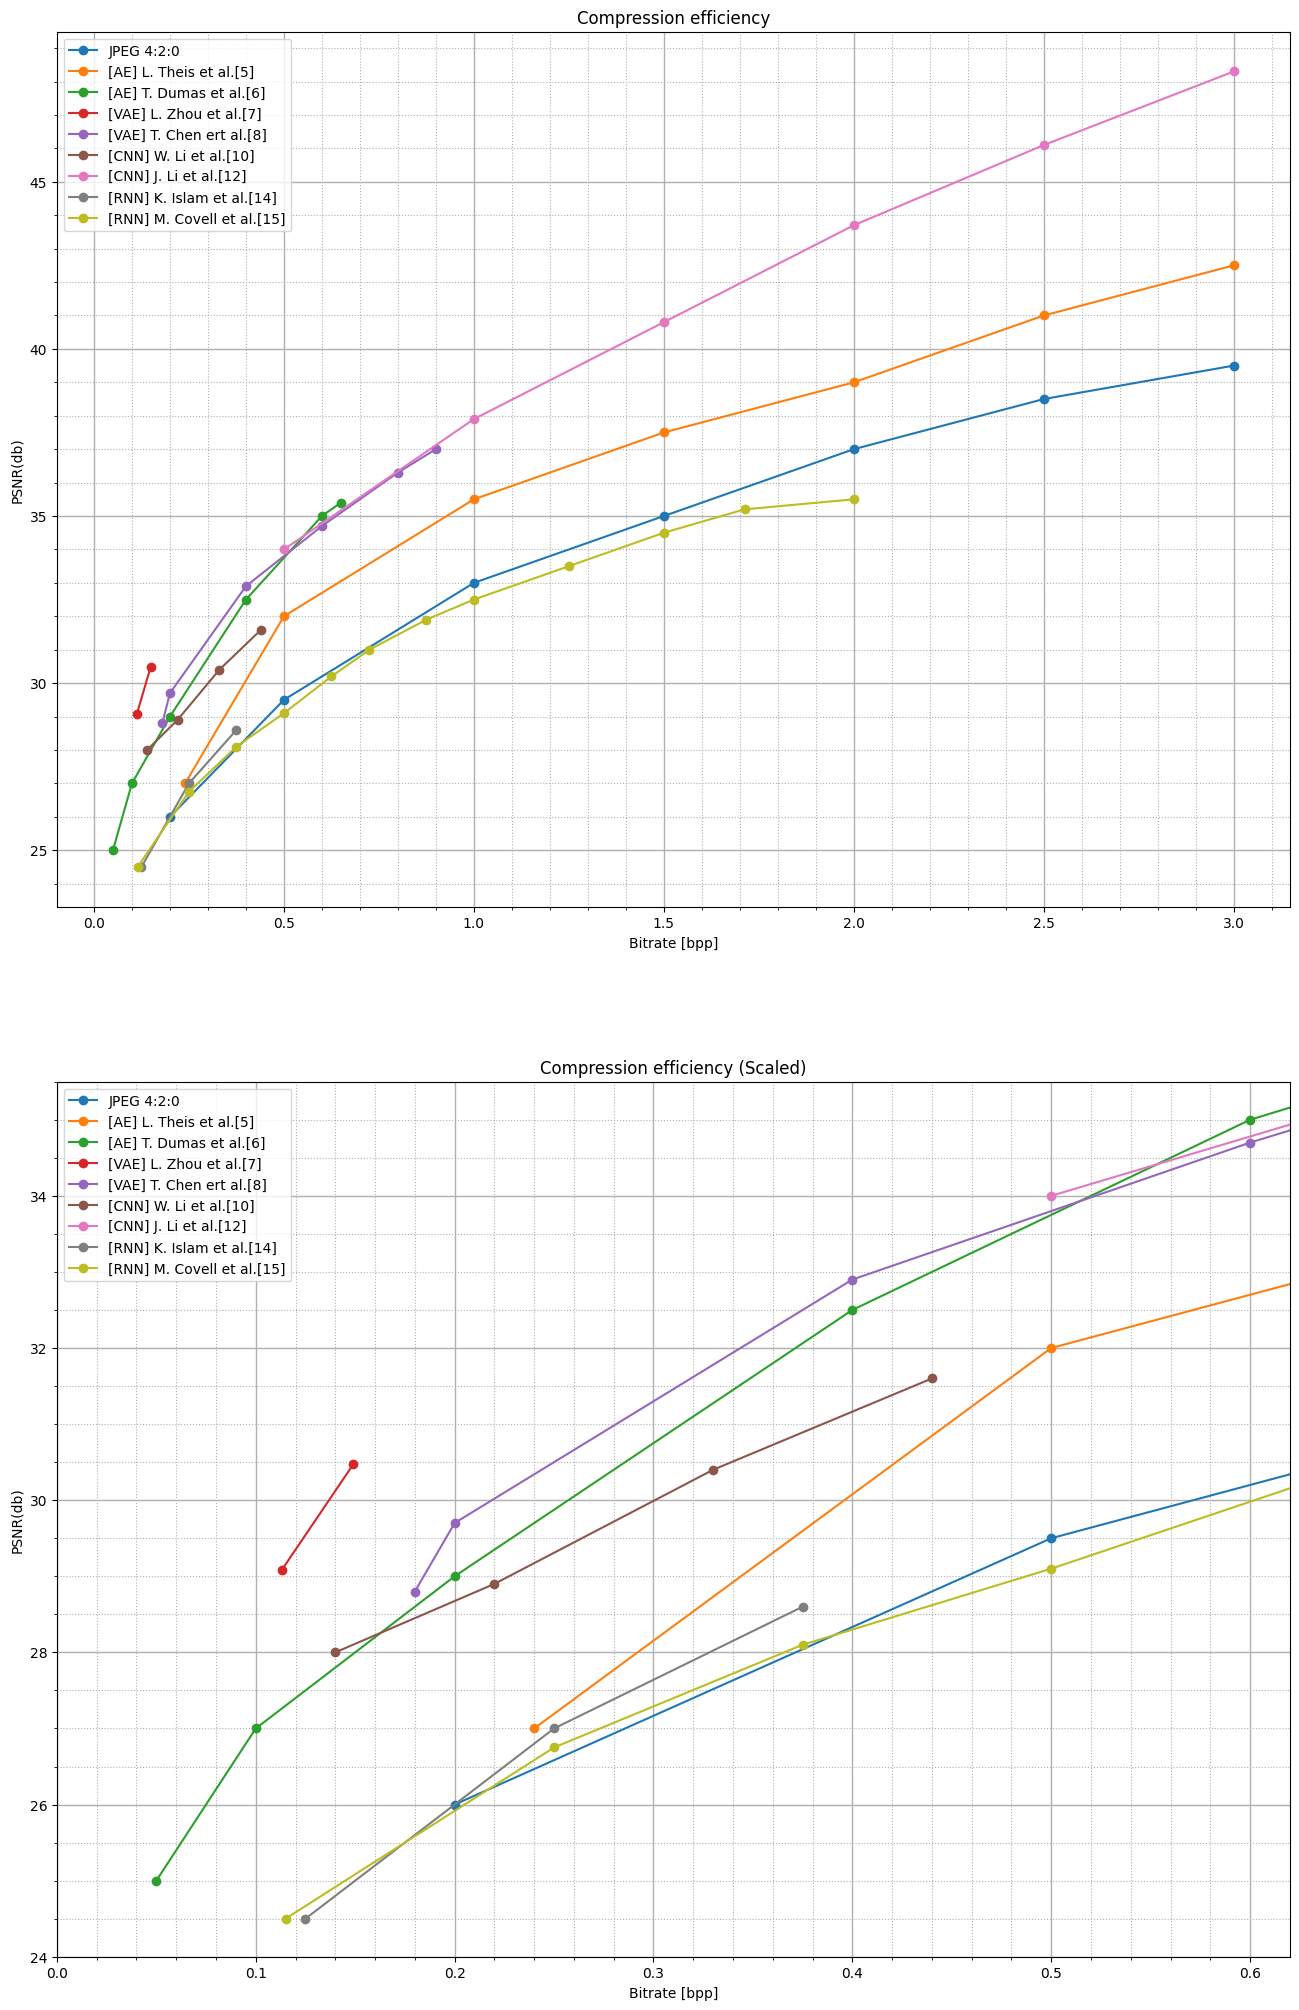

In [6]:
import matplotlib.pyplot as plt

jpeg_bpp = [0.2, 0.5, 1, 1.5, 2, 2.5, 3]
jpeg_psnr = [26, 29.5, 33, 35, 37, 38.5, 39.5]
bpp_5 = [0.24, 0.5, 1, 1.5, 2, 2.5, 3]
psnr_5 = [27, 32, 35.5, 37.5, 39, 41, 42.5]
bpp_6 = [0.05, 0.1, 0.2, 0.4, 0.6, 0.65]
psnr_6 = [25, 27, 29, 32.5, 35, 35.4]
bpp_7 = [0.149, 0.113]
psnr_7 = [30.47, 29.08]
bpp_8 = [0.18, 0.2, 0.4, 0.6, 0.8, 0.9]
psnr_8 = [28.8, 29.7, 32.9, 34.7, 36.3, 37]
bpp_10 = [0.14, 0.22, 0.33, 0.44]
psnr_10 = [28, 28.9, 30.4, 31.6]
bpp_12 = [0.5, 1, 1.5, 2, 2.5, 3]
psnr_12 = [34, 37.9, 40.8, 43.7, 46.1, 48.3]
bpp_14 = [0.125, 0.25, 0.375]
psnr_14 = [24.5, 27, 28.6]
bpp_15 = [0.115, 0.25, 0.375, 0.5, 0.625, 0.725, 0.875, 1, 1.25, 1.5, 1.7125, 2]
psnr_15 = [24.5, 26.75, 28.1, 29.1, 30.2, 31, 31.9, 32.5, 33.5, 34.5, 35.2, 35.5]

f = plt.figure()
f.set_figwidth(35)
f.set_figheight(25)

sp = plt.subplot(221)

plt.plot(jpeg_bpp, jpeg_psnr, 'o-')
plt.plot(bpp_5, psnr_5, 'o-')
plt.plot(bpp_6, psnr_6, 'o-')
plt.plot(bpp_7, psnr_7, 'o-')
plt.plot(bpp_8, psnr_8, 'o-')
plt.plot(bpp_10, psnr_10, 'o-')
plt.plot(bpp_12, psnr_12, 'o-')
plt.plot(bpp_14, psnr_14, 'o-')
plt.plot(bpp_15, psnr_15, 'o-')

plt.grid(True)
plt.title('Compression efficiency')
plt.ylabel('PSNR(db)')
plt.xlabel('Bitrate [bpp]')
plt.legend(['JPEG 4:2:0', 
            '[AE] L. Theis et al.[5]', 
            '[AE] T. Dumas et al.[6]', 
            '[VAE] L. Zhou et al.[7]', 
            '[VAE] T. Chen ert al.[8]', 
            '[CNN] W. Li et al.[10]', 
            '[CNN] J. Li et al.[12]', 
            '[RNN] K. Islam et al.[14]',
            '[RNN] M. Covell et al.[15]'],  loc='upper left')

plt.grid(which = "major", linewidth = 1)
plt.grid(which = "minor", linewidth = 0.8, linestyle=':')
plt.minorticks_on()


sp = plt.subplot(223)

plt.plot(jpeg_bpp, jpeg_psnr, 'o-')
plt.plot(bpp_5, psnr_5, 'o-')
plt.plot(bpp_6, psnr_6, 'o-')
plt.plot(bpp_7, psnr_7, 'o-')
plt.plot(bpp_8, psnr_8, 'o-')
plt.plot(bpp_10, psnr_10, 'o-')
plt.plot(bpp_12, psnr_12, 'o-')
plt.plot(bpp_14, psnr_14, 'o-')
plt.plot(bpp_15, psnr_15, 'o-')

plt.grid(True)
plt.title('Compression efficiency (Scaled)')
plt.ylabel('PSNR(db)')
plt.xlabel('Bitrate [bpp]')
plt.legend(['JPEG 4:2:0', 
            '[AE] L. Theis et al.[5]', 
            '[AE] T. Dumas et al.[6]', 
            '[VAE] L. Zhou et al.[7]', 
            '[VAE] T. Chen ert al.[8]', 
            '[CNN] W. Li et al.[10]', 
            '[CNN] J. Li et al.[12]', 
            '[RNN] K. Islam et al.[14]',
            '[RNN] M. Covell et al.[15]'],  loc='upper left')

plt.grid(which = "major", linewidth = 1)
plt.grid(which = "minor", linewidth = 0.8, linestyle=':')
plt.minorticks_on()

plt.xlim([0, 0.62])
plt.ylim([24, 35.5])

plt.show()


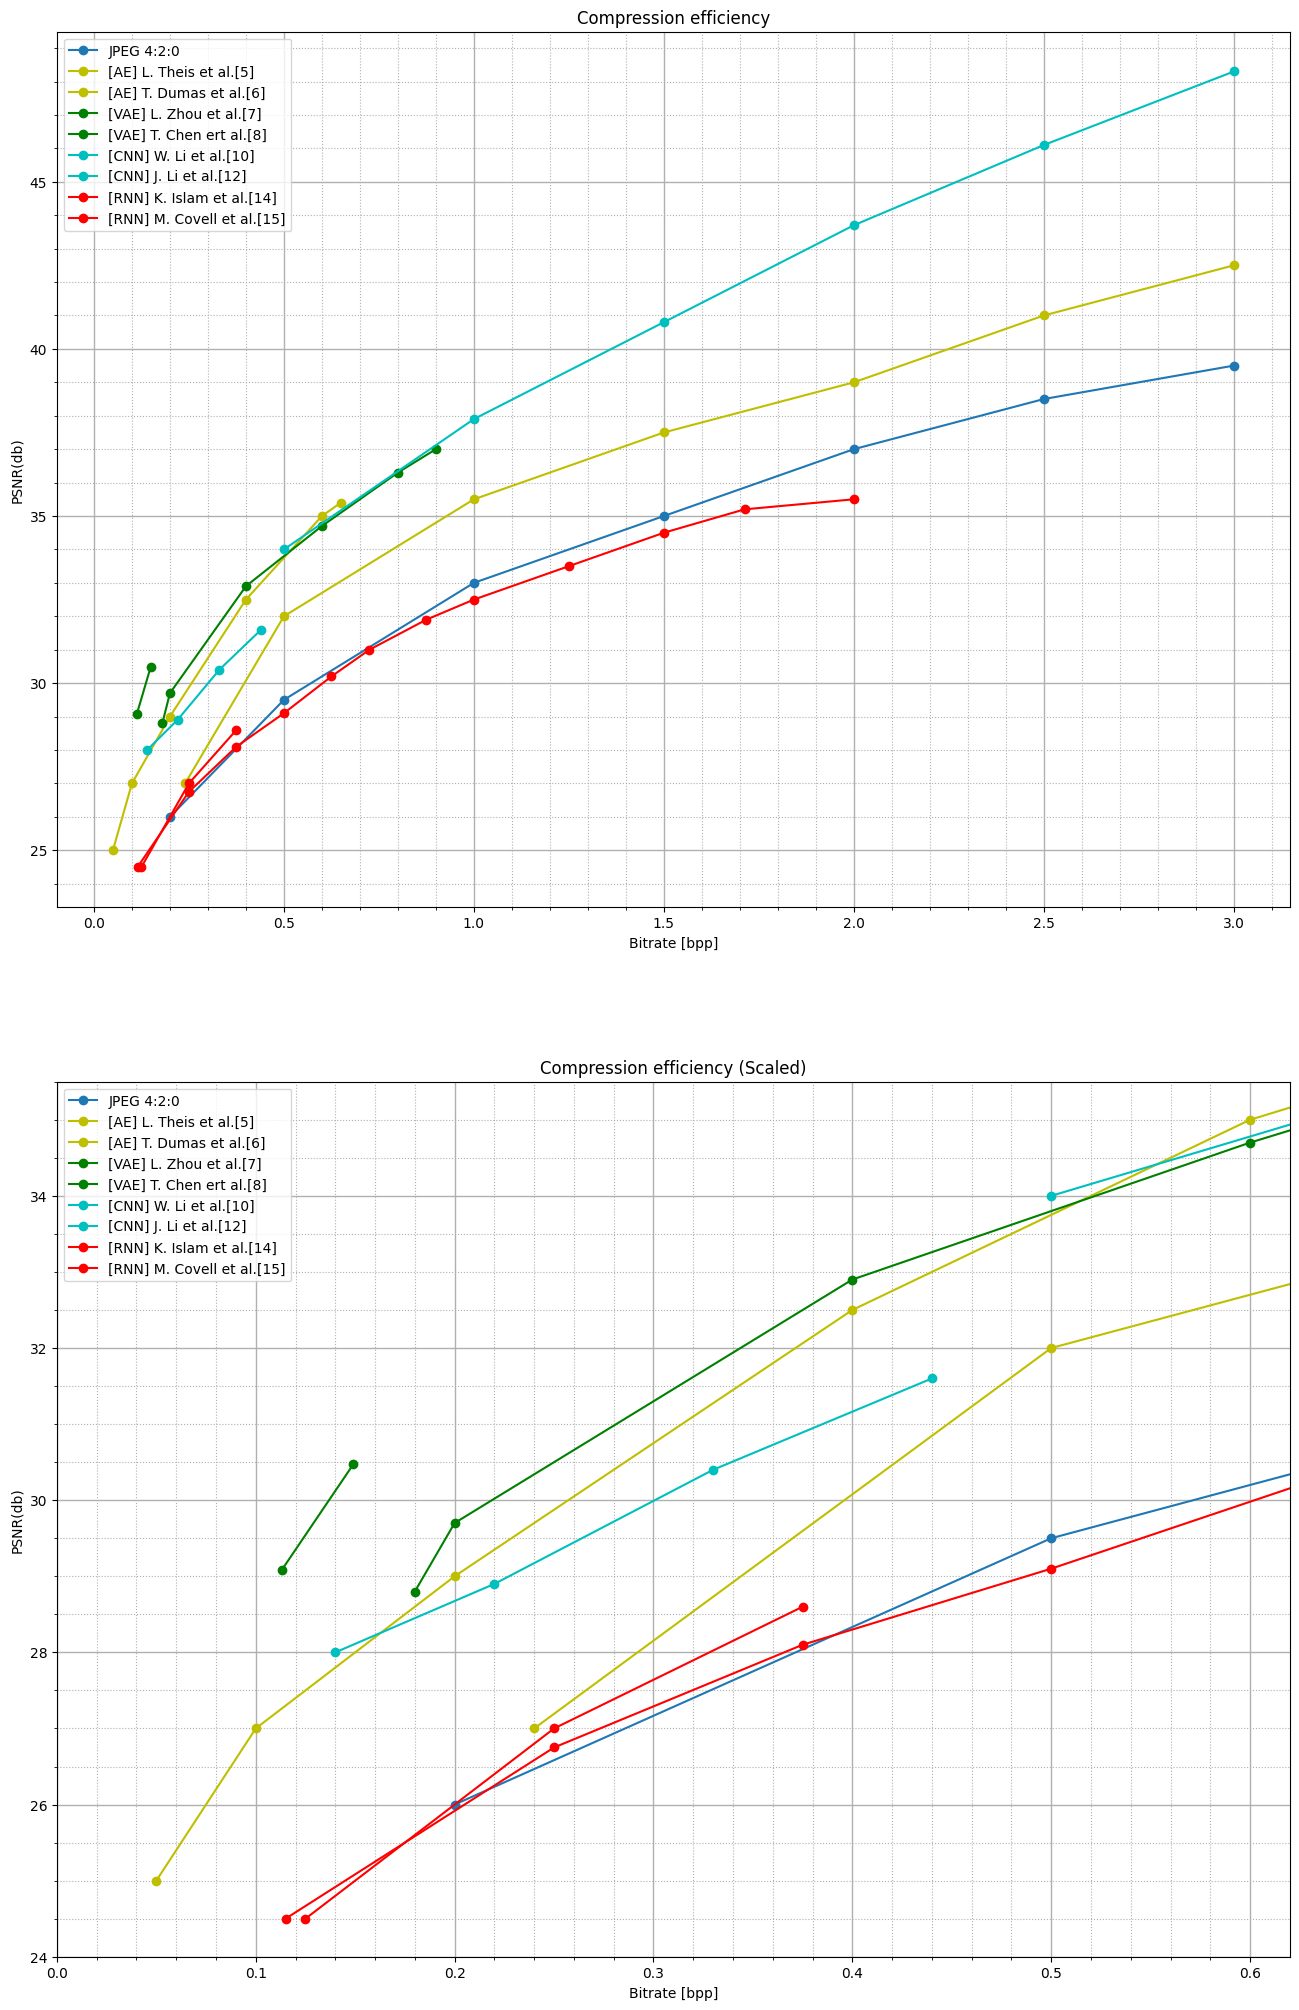

In [90]:
f = plt.figure()
f.set_figwidth(35)
f.set_figheight(25)

sp = plt.subplot(221)

plt.plot(jpeg_bpp, jpeg_psnr, 'o-')
plt.plot(bpp_5, psnr_5, 'yo-')
plt.plot(bpp_6, psnr_6, 'yo-')
plt.plot(bpp_7, psnr_7, 'go-')
plt.plot(bpp_8, psnr_8, 'go-')
plt.plot(bpp_10, psnr_10, 'co-')
plt.plot(bpp_12, psnr_12, 'co-')
plt.plot(bpp_14, psnr_14, 'ro-')
plt.plot(bpp_15, psnr_15, 'ro-')

plt.grid(True)
plt.title('Compression efficiency')
plt.ylabel('PSNR(db)')
plt.xlabel('Bitrate [bpp]')
plt.legend(['JPEG 4:2:0', 
            '[AE] L. Theis et al.[5]', 
            '[AE] T. Dumas et al.[6]', 
            '[VAE] L. Zhou et al.[7]', 
            '[VAE] T. Chen ert al.[8]', 
            '[CNN] W. Li et al.[10]', 
            '[CNN] J. Li et al.[12]', 
            '[RNN] K. Islam et al.[14]',
            '[RNN] M. Covell et al.[15]'],  loc='upper left')

plt.grid(which = "major", linewidth = 1)
plt.grid(which = "minor", linewidth = 0.8, linestyle=':')
plt.minorticks_on()

sp = plt.subplot(223)

plt.plot(jpeg_bpp, jpeg_psnr, 'o-')
plt.plot(bpp_5, psnr_5, 'yo-')
plt.plot(bpp_6, psnr_6, 'yo-')
plt.plot(bpp_7, psnr_7, 'go-')
plt.plot(bpp_8, psnr_8, 'go-')
plt.plot(bpp_10, psnr_10, 'co-')
plt.plot(bpp_12, psnr_12, 'co-')
plt.plot(bpp_14, psnr_14, 'ro-')
plt.plot(bpp_15, psnr_15, 'ro-')

plt.grid(True)
plt.title('Compression efficiency (Scaled)')
plt.ylabel('PSNR(db)')
plt.xlabel('Bitrate [bpp]')
plt.legend(['JPEG 4:2:0', 
            '[AE] L. Theis et al.[5]', 
            '[AE] T. Dumas et al.[6]', 
            '[VAE] L. Zhou et al.[7]', 
            '[VAE] T. Chen ert al.[8]', 
            '[CNN] W. Li et al.[10]', 
            '[CNN] J. Li et al.[12]', 
            '[RNN] K. Islam et al.[14]',
            '[RNN] M. Covell et al.[15]'],  loc='upper left')

plt.grid(which = "major", linewidth = 1)
plt.grid(which = "minor", linewidth = 0.8, linestyle=':')
plt.minorticks_on()

plt.xlim([0, 0.62])
plt.ylim([24, 35.5])

plt.show()